<a href="https://colab.research.google.com/github/Nicromano/Library/blob/master/TAREA_1_MODULO_4_JOSE_ALBERTO_LEON_ALARCON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio Módulo 4. Implementación y evaluación de algoritmos de clasificación en Python

NOMBRE: JOSÉ ALBERTO LEÓN ALARCÓN

## Objetivo.
Utilizando Python, implementar los algoritmos de clasificación analizados en clase y evaluarlos con las
medidas relacionadas con la matriz de confusión.
## Instrucciones.
Al finalizar el laboratorio debe subir a la plataforma 2 archivos, el primero contendrá todas las
instrucciones utilizadas en Python (.py) y el segundo archivo será un informe elaborado en un
procesador de palabras que contenga las respuestas a cada una de las preguntas planteadas en el
laboratorio junto con cada una de las instrucciones y salidas en Python que utilizó para responder a
esas preguntas.
Solo se calificará el contenido del informe. Es un requisito indispensable presentar el archivo de
Python para calificar el informe.
Pasos:
1. En base al dataset del Titanic usado en el módulo 2
2. Elabore un modelo de predicción sobre la supervivencia o no de un pasajero, para cada uno
de los algoritmos de clasificación revisados en este módulo.
3. Evalué a cada uno de los modelos.

Peguntas por resolver.
1. Antes de elaborar los modelos de predicción. ¿Hizo alguna modificación al conjunto de datos
original? ¿Cuáles fueron?
2. ¿Qué métricas utilizó para evaluar cada modelo? ¿Por qué las escogió?
3. ¿De acuerdo con la evaluación cuál es el mejor modelo para la predicción de este conjunto de
datos?
4. Es posible utilizar un algoritmo de regresión lineal para elaborar un modelo de predicción para
este conjunto de datos

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Cargar el dataset
file_path = '/content/TITANIC.csv'
titanic_df = pd.read_csv(file_path)

titanic_df.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:

# Llenar valores faltantes de 'Age' con la media
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# Llenar valores faltantes de 'Embarked' con la moda
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Eliminar la columna 'Cabin' debido a la gran cantidad de valores faltantes
titanic_df.drop(columns=['Cabin'], inplace=True)

# Codificar columnas categóricas
label_encoder_sex = LabelEncoder()
titanic_df['Sex'] = label_encoder_sex.fit_transform(titanic_df['Sex'])

# Convertir la columna 'Embarked' usando One-Hot Encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

# Eliminar columnas irrelevantes para el modelo
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Estandarizar las columnas 'Age' y 'Fare'
scaler = StandardScaler()
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])

# Dividir el dataset en conjuntos de entrenamiento y prueba
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresión Logistica

In [ ]:
# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predecir y evaluar
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]


Evaluación del modelo de Regresión Logistica

In [ ]:
# Métricas de evaluación
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cr_log_reg = classification_report(y_test, y_pred_log_reg)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2}", )
print("Classification Report:\n", cr_log_reg)



Logistic Regression Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



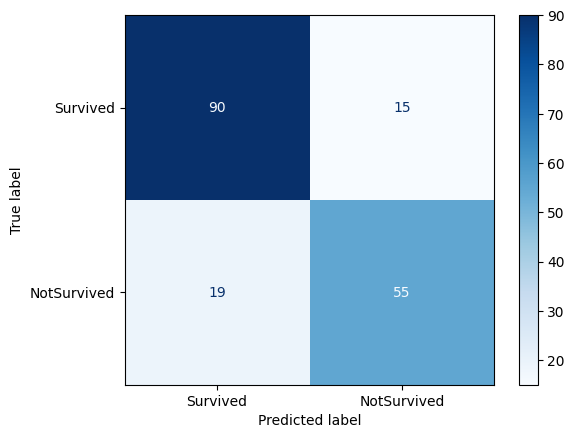

In [ ]:
# Presentar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Survived', 'NotSurvived'])
disp.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()

Curva ROC-AUC

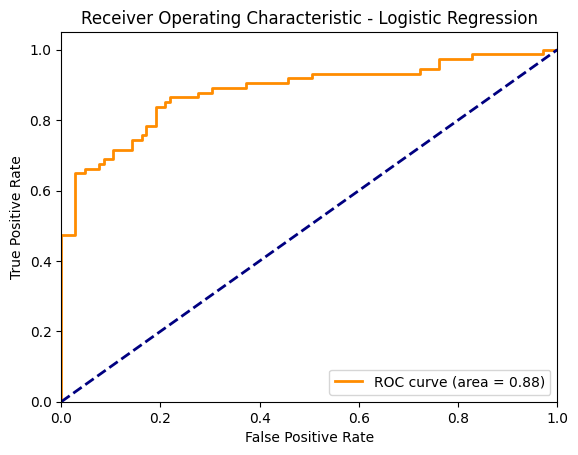

In [ ]:
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Árbol de Decisión

In [ ]:


# Entrenar el modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred_decision_tree = decision_tree.predict(X_test)
y_prob_decision_tree = decision_tree.predict_proba(X_test)[:, 1]

# Métricas de evaluación
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
cr_decision_tree = classification_report(y_test, y_pred_decision_tree)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob_decision_tree)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

print(f"Decision Tree Accuracy: {accuracy_decision_tree:.2}", )
print("Classification Report:\n", cr_decision_tree)



Decision Tree Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



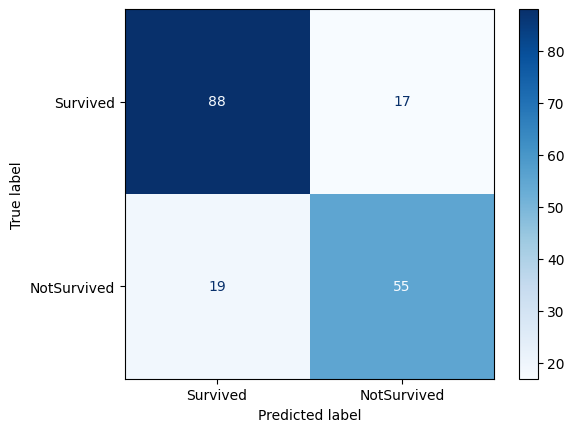

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree, display_labels=['Survived', 'NotSurvived'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Curva ROC-AUC

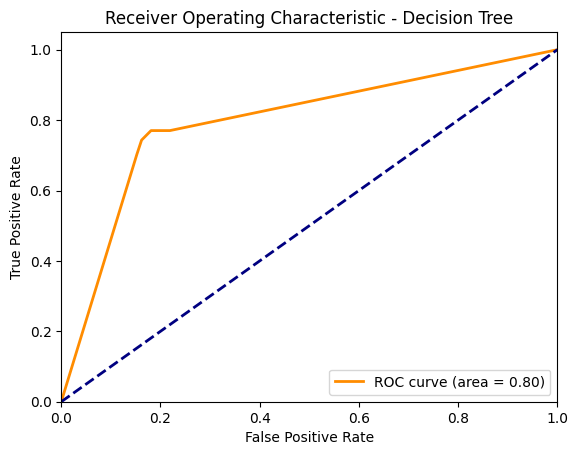

In [ ]:
plt.figure()
plt.plot(fpr_decision_tree, tpr_decision_tree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_decision_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:


# Entrenar el modelo de Bosque Aleatorio
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Predecir y evaluar
y_pred_random_forest = random_forest.predict(X_test)
y_prob_random_forest = random_forest.predict_proba(X_test)[:, 1]

# Métricas de evaluación
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
cr_random_forest = classification_report(y_test, y_pred_random_forest)
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_prob_random_forest)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

print(f"Random Forest Accuracy: {accuracy_random_forest:.2}", )
print("Classification Report:\n", cr_random_forest)




Random Forest Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



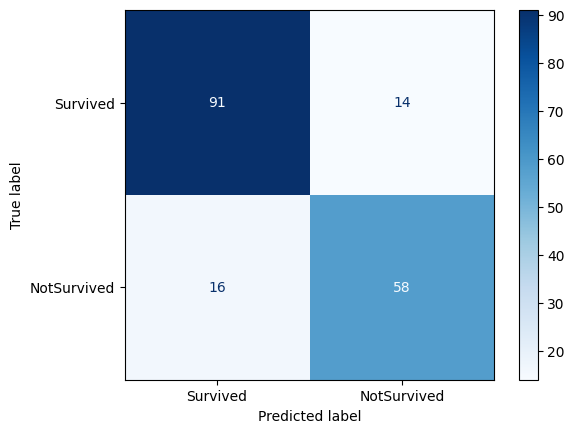

In [ ]:
# Presentar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest, display_labels=['Survived', 'NotSurvived'])
disp.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()

Curva ROC-AUC

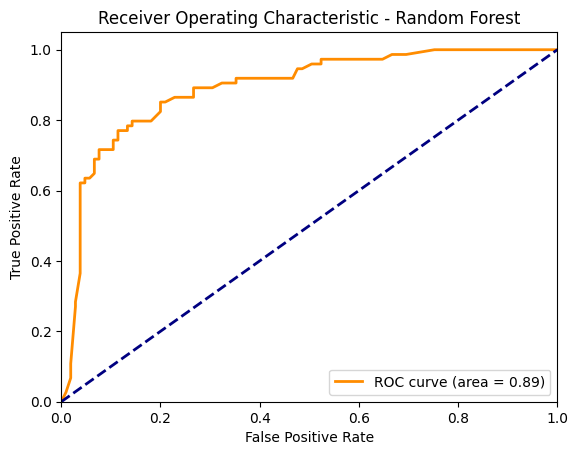

In [ ]:
# Curva ROC
plt.figure()
plt.plot(fpr_random_forest, tpr_random_forest, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_random_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Suport Vector Machine

In [ ]:
from sklearn.svm import SVC

# Entrenar el modelo de SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predecir y evaluar
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Métricas de evaluación
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cr_svm = classification_report(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

print(f"SVM Accuracy: {accuracy_svm:.2}")
print("Classification Report:\n", cr_svm)


SVM Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



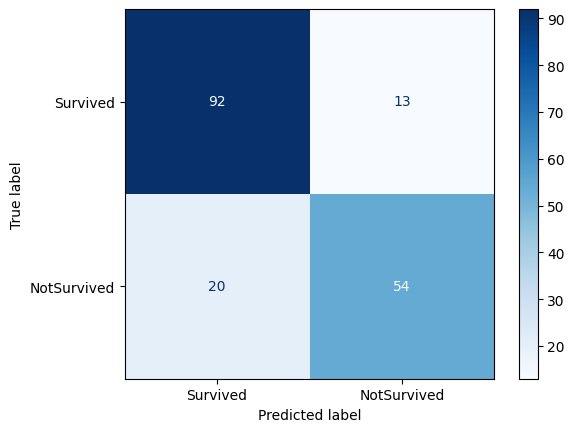

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Survived', 'NotSurvived'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Curva ROC-AUC

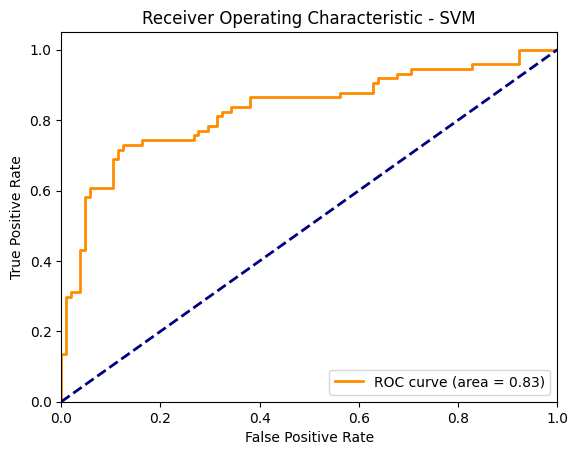

In [ ]:

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()


## k-nearest neighbors

In [ ]:
# Entrenar el modelo de KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predecir y evaluar
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Métricas de evaluación
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

print(f"KNN Accuracy: {accuracy_knn:.2}", )
print("Classification Report:\n", cr_knn)




KNN Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



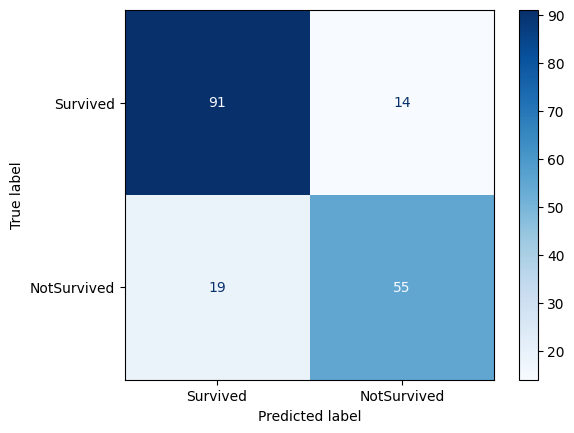

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Survived', 'NotSurvived'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Curva ROC-AUC

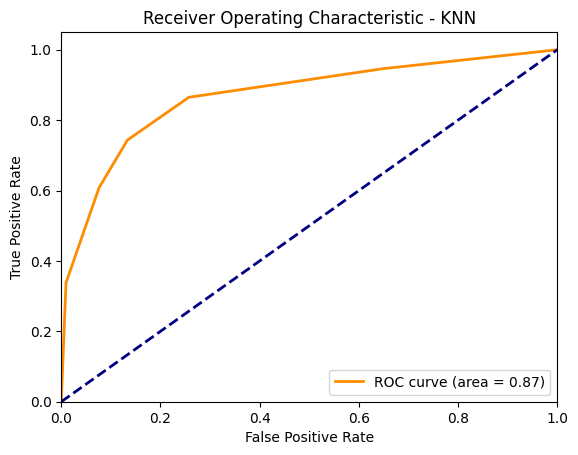

In [ ]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

**Peguntas por resolver.**
1.	**Antes de elaborar los modelos de predicción. ¿Hizo alguna modificación al conjunto de datos original? ¿Cuáles fueron?**

Si, se realizó un procesamiento de datos a los datos originales, entre ellos: Se completó los campos Age y Embarked con la media y moda, respectivamente. Se eliminó la columna Cabin por tener muchos valores faltantes. Se codificó la columna Sex con valores 0 y 1 para el sexo de los pasajeros. Se utilizó el proceso One-Hot Encoding para la columna Embarked, así tambien se estandarizó la columna Age y Fare. Las columnas como 'PassengerId', 'Name', 'Ticket' fueron eliminadas por asumir que no tienen información relevante que ayude al modelo.

2.	**¿Qué métricas utilizó para evaluar cada modelo? ¿Por qué las escogió?**

Se utilizó la metrica 'Accuracy' dado que se busca saber que pasajero sobrevivió o no

3.	**¿De acuerdo con la evaluación cuál es el mejor modelo para la predicción de este conjunto de datos?**

El mejor modelo en base a la evaluación dada, es el algoritmo de Random Forest que alcanzó un accuracy de 0.83

4.	**Es posible utilizar un algoritmo de regresión lineal para elaborar un modelo de predicción para este conjunto de datos**

Un algoritmo de regresión lineal no es apropiado para este conjunto de datos porque la regresión lineal está diseñada para problemas de predicción de valores continuos, mientras que en este caso, estamos tratando de predecir una variable categórica (supervivencia o no). En su lugar, utilizamos algoritmos de clasificación como los mencionados anteriormente.
